In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Read Data

In [3]:
df = pd.read_csv("../data/skylab_instagram_datathon_dataset.csv", sep=";")

In [14]:
summary = df.describe(include='all')
summary

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
count,704313,704313,704313,704313,704313,676558,458589,676558,458589,704313,5.792580e+05,695803.000000,684349.000000,6.953430e+05,6.959770e+05
unique,1,455,20,54,706,423,26,401,30,1,NaN,NaN,NaN,NaN,NaN
top,Weekly,2023-07-08,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,All Brands,LVMH Moet Hennessy Louis Vuitton SE,United States of America,LVMH Moet Hennessy Louis Vuitton SE,New York Stock Exchange,Metric Value,NaN,NaN,NaN,NaN,NaN
freq,704313,1635,216241,113744,27755,27576,193509,27576,132071,704313,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.342432e+07,344.272540,61.244426,3.043246e+04,2.163189e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.106975e+08,2777.396873,564.468480,2.766459e+05,1.803193e+07
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.013372e+05,19.000000,2.000000,3.710000e+02,1.727700e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.104144e+06,44.000000,7.000000,1.435000e+03,9.318400e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.479325e+06,122.000000,20.000000,5.872000e+03,4.577470e+05


In [4]:
# add id
df['data_ID'] = range(1, len(df) + 1)

In [5]:
# Converting the 'data_end_of_week' column to datetime
df['datetime_end_date'] = pd.to_datetime(df['period_end_date'])

In [4]:
# Sort DataFrame by 'brand' and 'date'
df = df.sort_values(by=['business_entity_doing_business_as_name', 'datetime_end_date'])

# Calculate the difference in days to the next date within each 'brand'
df['diff_date'] = df.groupby('business_entity_doing_business_as_name')['datetime_end_date'].diff(-1).dt.days * -1

a = df[df['diff_date'] == 0]

In [9]:

# group by compset_group and business_entity_doing_business_as_name
df_grouped = df.groupby(['period_end_date', 'business_entity_doing_business_as_name'])

# count the unique number of followers for each brand
a = df_grouped['followers'].transform('nunique')

# get those brands and date where the number of followers is greater than 1
b = df[a > 1]
b["business_entity_doing_business_as_name"].unique()


array(['All Brands'], dtype=object)

In [13]:
# Find rows where column 'A' starts with 'Don'
mask = df['business_entity_doing_business_as_name'].str.startswith('Do')
selected_rows = df[mask]

selected_rows["business_entity_doing_business_as_name"].unique()

array(['Dollar Tree', 'Donna Karan', 'Dos Equis XX', 'Doyoueven',
       'Dolce & Gabbana', "Domino's Pizza", 'Dockers', 'Dove',
       'Dollar General'], dtype=object)

## Columns, rows, values, shape

In [81]:
print("Columns")
cols = df.columns
cols

Columns


Index(['period', 'period_end_date', 'compset_group', 'compset',
       'business_entity_doing_business_as_name', 'legal_entity_name',
       'domicile_country_name', 'ultimate_parent_legal_entity_name',
       'primary_exchange_name', 'calculation_type', 'followers', 'pictures',
       'videos', 'comments', 'likes', 'data_ID', 'datetime_end_date',
       'diff_date'],
      dtype='object')

In [82]:
print("Shape")
df.shape

Shape


(704313, 18)

In [83]:
print("unique values overview")
unique_values = {col: df[col].unique() for col in cols}
unique_values

unique values overview


{'period': array(['Weekly'], dtype=object),
 'period_end_date': array(['2017-05-06', '2017-05-13', '2017-05-20', '2017-05-27',
        '2017-06-03', '2017-06-10', '2017-06-17', '2017-06-24',
        '2017-07-01', '2017-07-08', '2017-07-15', '2017-07-22',
        '2017-07-29', '2017-08-05', '2017-08-12', '2017-08-19',
        '2017-08-26', '2017-09-02', '2017-09-09', '2017-09-16',
        '2017-09-23', '2017-09-30', '2017-10-07', '2017-10-14',
        '2017-10-21', '2017-10-28', '2017-11-04', '2017-11-11',
        '2017-11-18', '2017-11-25', '2017-12-02', '2017-12-09',
        '2017-12-16', '2017-12-23', '2017-12-30', '2018-01-06',
        '2018-01-13', '2018-01-20', '2018-01-27', '2018-02-03',
        '2018-02-10', '2018-02-17', '2018-02-24', '2018-03-03',
        '2018-03-10', '2018-03-17', '2018-03-24', '2018-03-31',
        '2018-04-07', '2018-04-14', '2018-04-21', '2018-04-28',
        '2018-05-05', '2018-05-12', '2018-05-19', '2018-05-26',
        '2018-06-02', '2018-06-09', '2018

In [84]:
## if you want to check a specific column
specific_column = "calculation_type" #"business_entity_doing_business_as_name"
vals = unique_values[specific_column]
vals, vals.shape

(array(['Metric Value'], dtype=object), (1,))

# Overview of data

## Total aggregation over time

In [85]:
def total_aggregate(agg_by):
    # Aggregating likes per date
    aggregated_data = df.groupby('datetime_end_date')[agg_by].sum().reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(aggregated_data['datetime_end_date'], aggregated_data[agg_by], marker='o')
    plt.title(f'Total {agg_by} Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'Total {agg_by}')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.tight_layout()
    plt.show()


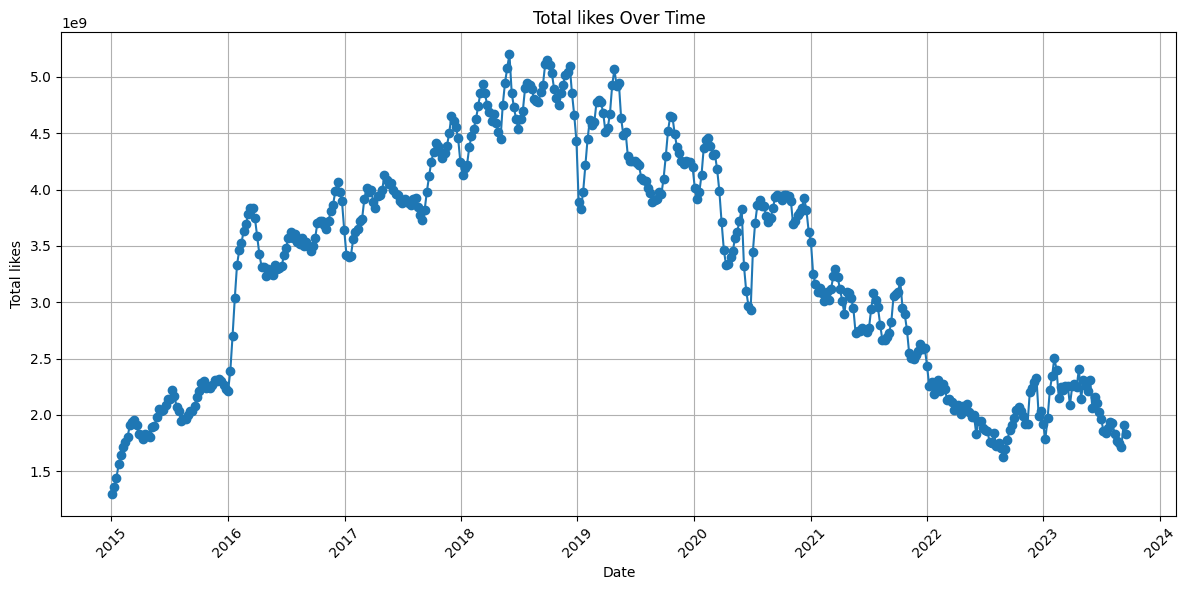

In [86]:
total_aggregate("likes")

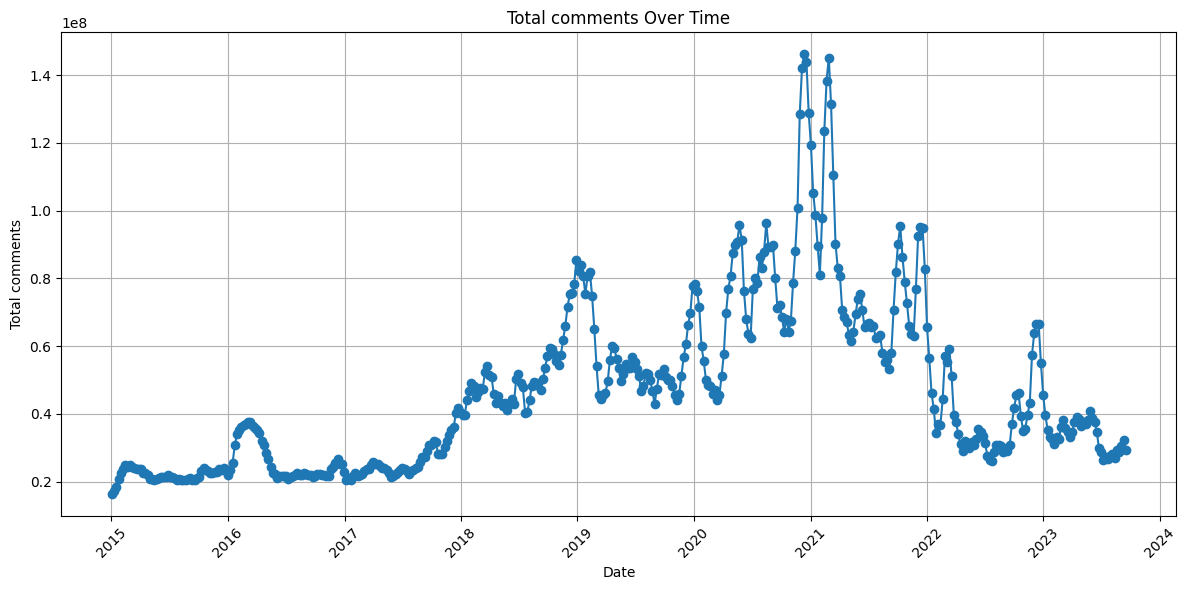

In [87]:
total_aggregate("comments")

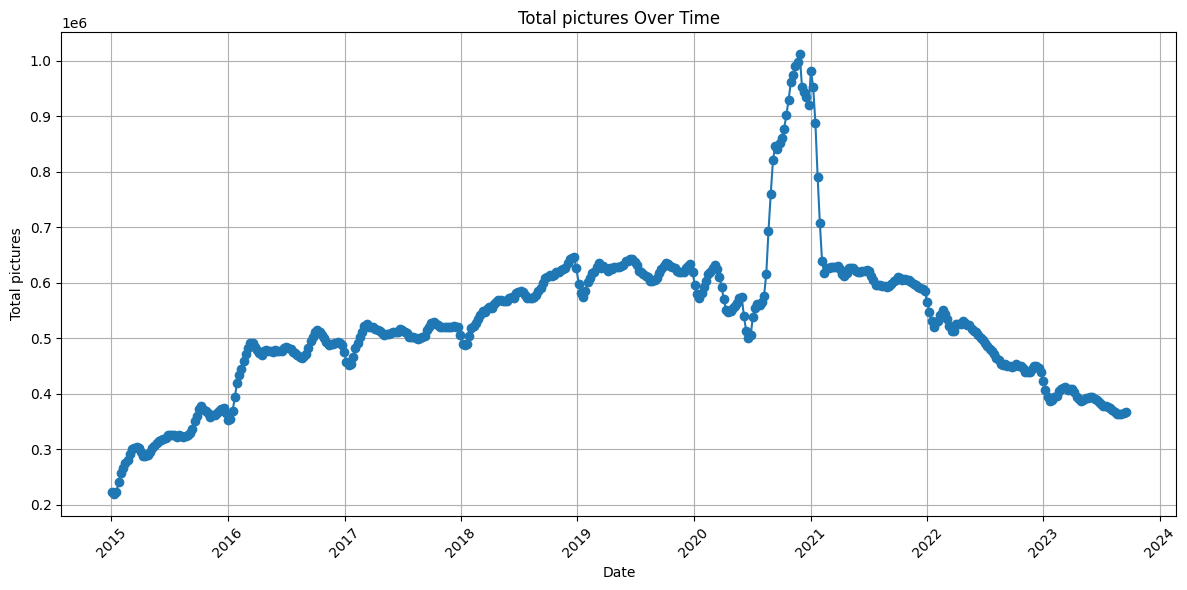

In [88]:
total_aggregate("pictures")

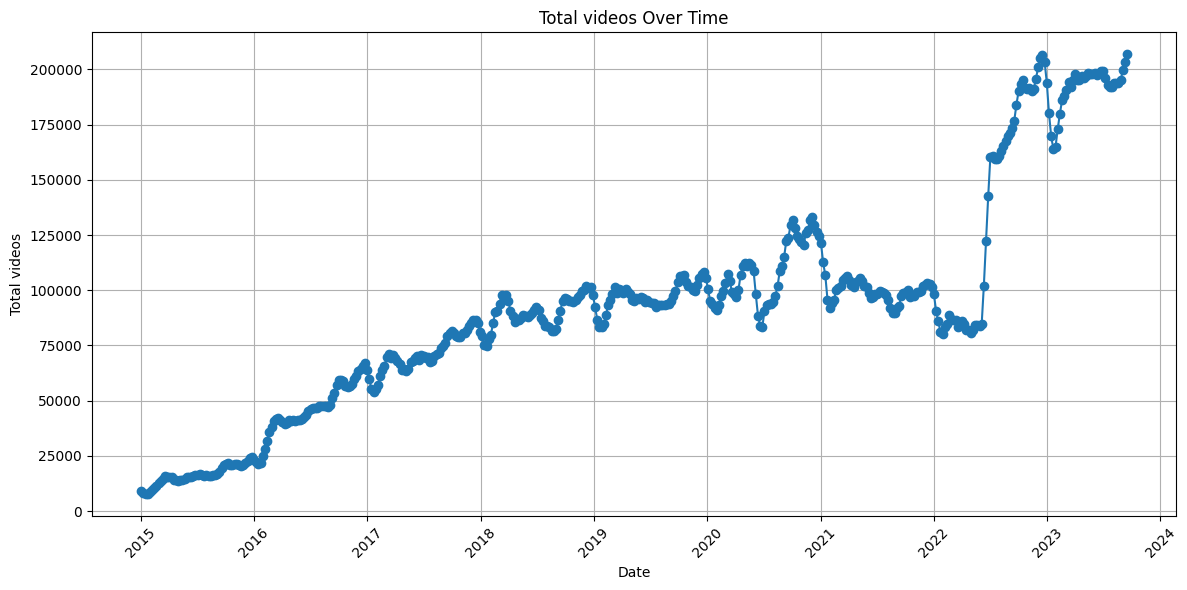

In [89]:
total_aggregate("videos")

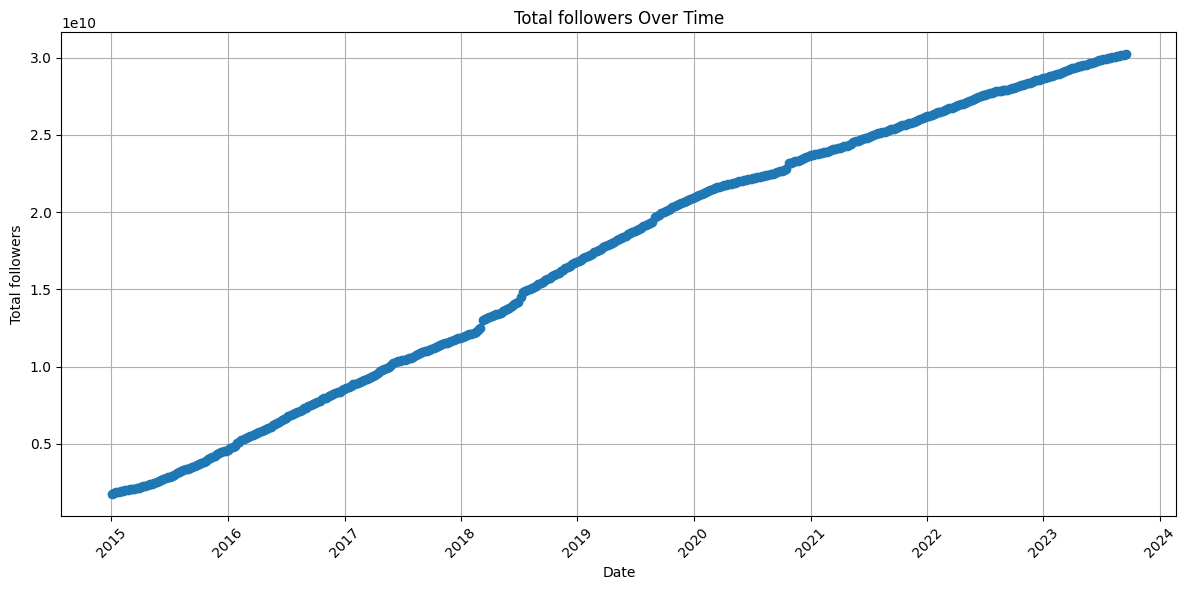

In [90]:
total_aggregate("followers")

# Data engineering

## Get list of all dates

In [91]:
# Get first occuring date and last occuring date
first_date = df['datetime_end_date'].min()
last_date = df['datetime_end_date'].max()

# since it is the end date substract 7 days from first_date
real_first_date = first_date - pd.Timedelta(days=7)

first_date, real_first_date, last_date

(Timestamp('2015-01-03 00:00:00'),
 Timestamp('2014-12-27 00:00:00'),
 Timestamp('2023-09-16 00:00:00'))

In [92]:
# Creating a list of all days between the first and last date
date_range_days = pd.date_range(start=real_first_date, end=last_date, freq='D')

# Converting to list if necessary
list_of_days = date_range_days.tolist()

In [93]:
# trying out featuretools
# Create an EntitySet
es = ft.EntitySet(id='likes')

# Add the dataframe as an entity to our EntitySet
es = es.add_dataframe(
    dataframe_name='superlikes',
    dataframe=df,
    index='data_id',  # This needs to be a unique index for each record
    time_index='datetime_end_date'
)

# Run deep feature synthesis to create new features
features, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name='superlikes',
    agg_primitives=['mean', 'sum', 'std'],  # Aggregation functions
    trans_primitives=['month', 'weekday'],  # Transformative functions to extract more info from dates
    max_depth=2  # Controls the complexity of the generated features
)

features


/usr/local/lib/python3.12/site-packages/featuretools/entityset/entityset.py:1914: UserWarning: index data_id not found in dataframe, creating new integer column
  warnings.warn(
/usr/local/lib/python3.12/site-packages/featuretools/entityset/entityset.py:1505: SyntaxWarning: invalid escape sequence '\l'
  columns_string = "\l".join(column_typing_info)  # noqa: W605
/usr/local/lib/python3.12/site-packages/featuretools/entityset/entityset.py:1507: SyntaxWarning: invalid escape sequence '\l'
  label = "{%s |%s\l}" % (df.ww.name, columns_string)  # noqa: W605
/usr/local/lib/python3.12/site-packages/featuretools/entityset/entityset.py:1510: SyntaxWarning: invalid escape sequence '\l'
  label = "{%s (%d row%s)|%s\l}" % (  # noqa: W605


KeyboardInterrupt: 

# Engagement rate

In [ ]:
def engagement_rate(dataframe):
    return dataframe['likes'] / dataframe['followers']

df["engagement"] = engagement_rate(df)
df['engagement'].fillna(0, inplace=True)
df.sort_values(by='engagement', ascending=False, inplace=True)
df

/tmp/ipykernel_489/480319897.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engagement'].fillna(0, inplace=True)


,data_id,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes,data_ID,datetime_end_date,diff_date,engagement
116184,116184,Weekly,2022-10-29,Luxury & Premium & Mainstream,Soft Luxury,Bottega Veneta,Kering,France,Kering,Euronext Paris,Metric Value,0,0,0,0,0,159979,2022-10-29,0,NaN
116163,116163,Weekly,2022-09-24,Luxury & Premium & Mainstream,Soft Luxury,Bottega Veneta,Kering,France,Kering,Euronext Paris,Metric Value,0,0,0,0,0,159578,2022-09-24,0,NaN
116194,116194,Weekly,2022-11-12,Luxury & Premium & Mainstream,Global Luxury Analysts Interest List,Bottega Veneta,Kering,France,Kering,Euronext Paris,Metric Value,0,0,0,0,0,160607,2022-11-12,7,NaN
116158,116158,Weekly,2022-09-10,Luxury & Premium & Mainstream,Global Luxury Analysts Interest List,Bottega Veneta,Kering,France,Kering,Euronext Paris,Metric Value,0,0,0,0,0,161080,2022-09-10,7,NaN
116193,116193,Weekly,2022-11-12,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Bottega Veneta,Kering,France,Kering,Euronext Paris,Metric Value,0,0,0,0,0,160357,2022-11-12,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566554,566554,Weekly,2016-06-04,Food Products,Food Products,Silk,Danone,France,Danone,Euronext Paris,Metric Value,<NA>,12,0,99,4790,446730,2016-06-04,0,0.0
571570,571570,Weekly,2016-06-04,Apparel Retail,Fast Fashion,Skip Hop,Carter's,United States of America,Carter's,New York Stock Exchange,Metric Value,<NA>,30,1,608,16274,177852,2016-06-04,7,0.0
548235,548235,Weekly,2016-06-04,Luxury & Premium & Mainstream,Footwear,Sam Edelman,Caleres Inc,United States of America,Caleres Inc,New York Stock Exchange,Metric Value,<NA>,32,1,753,36270,58436,2016-06-04,0,0.0
548236,548236,Weekly,2016-06-04,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Sam Edelman,Caleres Inc,United States of America,Caleres Inc,New York Stock Exchange,Metric Value,<NA>,32,1,753,36270,58800,2016-06-04,0,0.0


In [ ]:
df.head()

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0


In [6]:
# Extract components

df['Year'] = df['datetime_end_date'].dt.year
df['Month'] = df['datetime_end_date'].dt.month
df['Day'] = df['datetime_end_date'].dt.day
df2 = df
df = pd.get_dummies(df, columns=['period', "compset_group", "legal_entity_name",
                                                "ultimate_parent_legal_entity_name", "primary_exchange_name"])
df.head()

,period_end_date,compset,business_entity_doing_business_as_name,domicile_country_name,calculation_type,followers,pictures,videos,comments,likes,...,primary_exchange_name_Nyse Euronext - Euronext Brussels;,primary_exchange_name_Omx Nordic Exchange Copenhagen A/S,primary_exchange_name_Philippine Stock Exchange Inc.,primary_exchange_name_Shanghai Stock Exchange,primary_exchange_name_Shanghai Stock Exchange;Hong Kong Exchange,primary_exchange_name_Singapore Exchange,primary_exchange_name_Six Swiss Exchange,primary_exchange_name_Tokyo Stock Exchange,primary_exchange_name_Toronto Stock Exchange,primary_exchange_name_Warsaw Stock Exchange/Equities/Main Market
0,2019-12-07,Soft Luxury,Versace,United States of America,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0,...,False,False,False,False,False,False,False,False,False,False
1,2021-01-30,Luxury & Premium & Mainstream,Versace,United States of America,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0,...,False,False,False,False,False,False,False,False,False,False
2,2016-05-14,Soft Luxury,Versace,United States of America,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0,...,False,False,False,False,False,False,False,False,False,False
3,2019-04-20,Luxury & Premium & Mainstream,Versace,United States of America,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0,...,False,False,False,False,False,False,False,False,False,False
4,2023-03-25,US Softlines Analyst Interest List,Versace,United States of America,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0,...,False,False,False,False,False,False,False,False,False,False


In [7]:

brand = pd.get_dummies(df['business_entity_doing_business_as_name'], prefix='brand', drop_first=True)
print(brand.columns)
df2 = df
df = pd.get_dummies(df, columns=["business_entity_doing_business_as_name"], prefix='brand')
df.head()

Index(['brand_3.1 Phillip Lim', 'brand_3CE', 'brand_A. Lange & Soehne',
       'brand_ANIMALE', 'brand_Abercrombie & Fitch', 'brand_About You',
       'brand_Absolut', 'brand_Academy Sports + Outdoors',
       'brand_Acne Studios', 'brand_Adidas',
       ...
       'brand_Zalando', 'brand_Zales', 'brand_Zara', 'brand_Zegna',
       'brand_Zenith', 'brand_bareMinerals', 'brand_dd's Discounts',
       'brand_e.l.f.', 'brand_iRobot', 'brand_shopDisney'],
      dtype='object', length=705)


,period_end_date,compset,domicile_country_name,calculation_type,followers,pictures,videos,comments,likes,data_ID,...,brand_Zalando,brand_Zales,brand_Zara,brand_Zegna,brand_Zenith,brand_bareMinerals,brand_dd's Discounts,brand_e.l.f.,brand_iRobot,brand_shopDisney
0,2019-12-07,Soft Luxury,United States of America,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0,1,...,False,False,False,False,False,False,False,False,False,False
1,2021-01-30,Luxury & Premium & Mainstream,United States of America,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0,2,...,False,False,False,False,False,False,False,False,False,False
2,2016-05-14,Soft Luxury,United States of America,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0,3,...,False,False,False,False,False,False,False,False,False,False
3,2019-04-20,Luxury & Premium & Mainstream,United States of America,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0,4,...,False,False,False,False,False,False,False,False,False,False
4,2023-03-25,US Softlines Analyst Interest List,United States of America,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0,5,...,False,False,False,False,False,False,False,False,False,False


In [8]:
features = np.concatenate((['followers', 'pictures', 'videos', 'comments', "Year", "Month", "Day"]))  # Choosing which features to include
print(features)
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)  # Normalizing the features

# PCA
pca = PCA(n_components=2)  # We use 2 components for illustration
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

principal_df

# Combine with original data for visualization
#final_df = pd.concat([principal_df, df[['Hour']]], axis=1)

# Print results
#print(final_df.head())
#print("Explained variance ratio:", pca.explained_variance_ratio_)

: 